In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
df=pd.read_csv('contacts_sampled_graph.csv').drop('Unnamed: 0', axis=1)

In [6]:
gdf=gpd.read_file('./raw-updated/uid.gpkg')

In [112]:
persons=pd.read_csv('./raw-updated-sampled/persons.csv')
homes=pd.read_csv('./raw-updated-sampled/homes.csv')
activities=pd.read_csv('./raw-updated-sampled/activities.csv')

In [123]:
# persons[['pid','hid']]


df_aggregated_contacts=df.merge(persons[['person_id_gt','hid']], 
         left_on='u', 
         right_on='person_id_gt').merge(persons[['person_id_gt','hid']], 
                                        left_on='v', 
                                        right_on='person_id_gt').rename(columns ={'hid_x': 'source', 'hid_y':'target'}).drop(['person_id_gt_x','person_id_gt_y'], axis=1)



In [124]:
df_aggregated_contacts.head()

,u,v,duration,purpose,source,target
0,836,5779575,246,2,3704645,3174986
1,1400084,5779575,932,2,146291,3174986
2,1732028,5779575,3536,2,4667726,3174986
3,2159883,5779575,5400,2,1040027,3174986
4,4856583,5779575,5400,2,291770,3174986


In [94]:
gdf_sampled=gdf.merge(homes, left_on='uid', right_on='hzone').drop('Unnamed: 0', axis=1).to_crs('epsg:3857')
gdf_sampled.head()

,uid,geometry,hid,hinsee,hzone
0,631624,POINT (255306.151 6257389.382),2986114,92044,631624
1,631624,POINT (255306.151 6257389.382),2986886,92044,631624
2,856856,POINT (262364.691 6244403.640),789293,75113,856856
3,786453,POINT (260228.399 6254674.607),817124,75109,786453
4,677960,POINT (256906.069 6247527.300),745449,75115,677960


In [12]:
mapp=gpd.read_file('./data/communes/communes-dile-de-france-au-01-janvier.shp').to_crs(gdf.crs)

(150224.64877704866, 399146.0358376671, 6118801.955008224, 6321043.975789138)

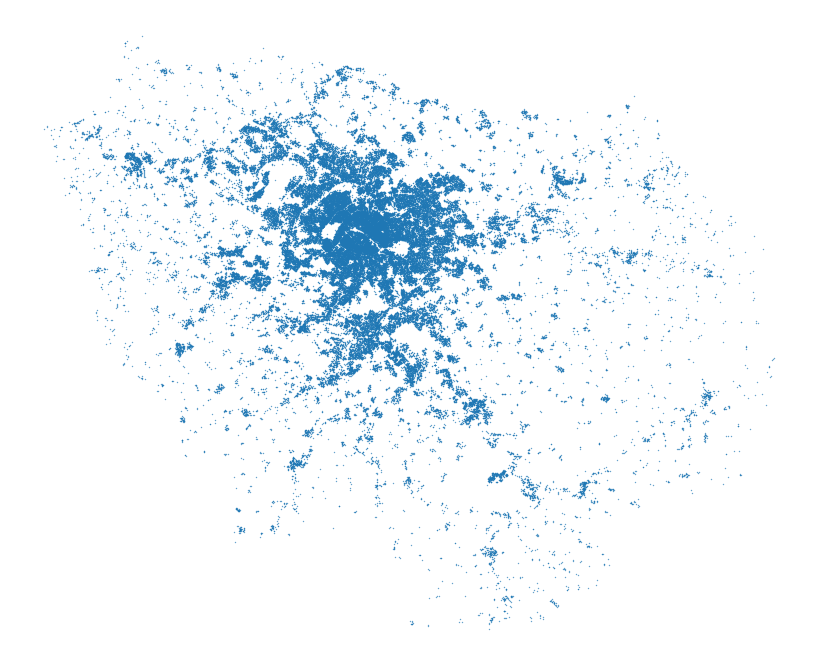

In [97]:
scale=4.
fig, ax=plt.subplots(figsize=(4*scale,3*scale))
#mapp.boundary.plot(color='k', lw=1/20, ax=ax)
gdf_sampled.plot(ax=ax, markersize=1./10)

plt.axis('off')

In [126]:
gdf_sampled

,uid,geometry,hid,hinsee,hzone
0,631624,POINT (255306.151 6257389.382),2986114,92044,631624
1,631624,POINT (255306.151 6257389.382),2986886,92044,631624
2,856856,POINT (262364.691 6244403.640),789293,75113,856856
3,786453,POINT (260228.399 6254674.607),817124,75109,786453
4,677960,POINT (256906.069 6247527.300),745449,75115,677960
...,...,...,...,...,...
106803,1022145,POINT (268411.144 6214636.444),2540200,91521,1022145
106804,1473717,POINT (291084.483 6202049.097),1559817,77495,1473717
106805,1275862,POINT (278818.413 6264333.989),3424792,93005,1275862
106806,1692787,POINT (353269.661 6217745.063),1168126,77020,1692787


In [134]:
# GEPHI input data

nodes=pd.DataFrame({'id': gdf_sampled.hid.values, 'x': gdf_sampled.geometry.x.values, 'y': gdf_sampled.geometry.y.values})
# nodes.head()

edges=df_aggregated_contacts[['source','target','duration','purpose']]

In [135]:
nodes.to_csv('nodes.csv', index=False)
edges.to_csv('edges.csv', index=False)

In [ ]:
# nodes => hid, x, y
# edges => u, v, weight